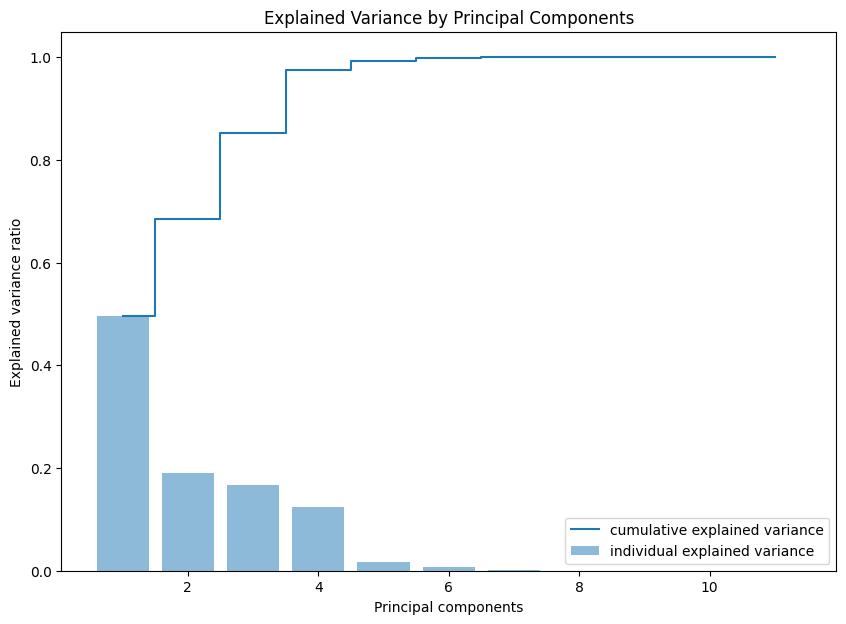

Coeficientes (Loadings) das variáveis para cada componente principal:
                           PC1       PC2       PC3       PC4       PC5  \
ano_ingresso         -0.197707 -0.284943  0.542719  0.234521  0.026504   
ultimo_periodo       -0.008926 -0.326801  0.604313  0.278861 -0.046862   
homem                -0.038029 -0.584145 -0.375548  0.127621 -0.002060   
mulher                0.038029  0.584145  0.375548 -0.127621  0.002060   
ch_cumprida           0.423760 -0.050839  0.039873  0.007323 -0.077519   
ch_cumprida_dividida  0.423705 -0.051458  0.040359  0.007169 -0.076899   
ch_reprovacao         0.210821  0.203225 -0.125453  0.635308  0.702114   
taxa_reprovacao      -0.143070  0.274507 -0.185848  0.656031 -0.660537   
semestre_total        0.421295 -0.048066  0.037941  0.016716 -0.143356   
semestre_dividido     0.421252 -0.048916  0.038226  0.016436 -0.140622   
matricula             0.423066 -0.054481  0.042322 -0.003835 -0.124788   

                           PC6       PC7 

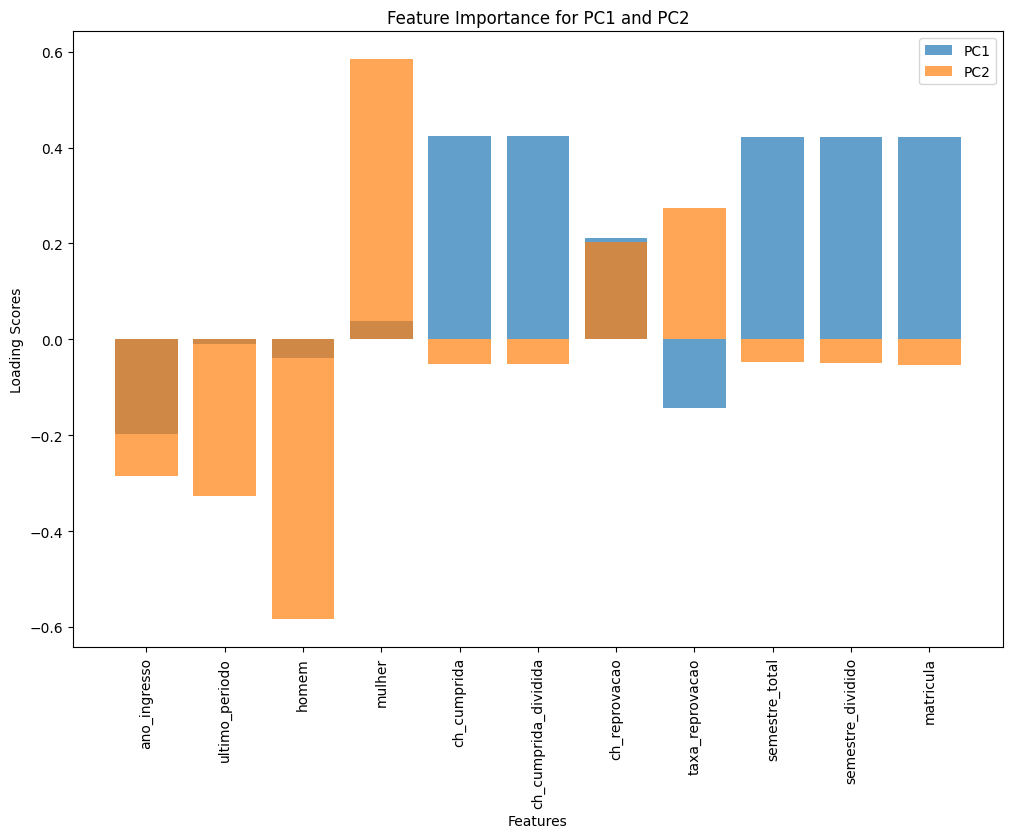

In [5]:
# Importando as Bibliotecas Necessárias
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregando e Preparando os Dados
df = pd.read_csv('df_total.csv', sep=',')

# Remova a variável dependente se estiver presente
if 'status' in df.columns:
    df = df.drop(columns=['status'])

# Padronizando os dados (muito importante para PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicando PCA
# Inicializando o PCA
pca = PCA(n_components=None)  # n_components=None significa que manteremos todos os componentes
df_pca = pca.fit_transform(df_scaled)

# Criando um DataFrame com os componentes principais
pca_columns = [f'PC{i+1}' for i in range(df.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=pca_columns)

# Explicando a Variância
# Variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Plotando a variância explicate
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Analisando a Importância das Variáveis
# Coeficientes dos componentes principais
loadings = pca.components_.T

# Criando um DataFrame para facilitar a visualização
loadings_df = pd.DataFrame(loadings, columns=pca_columns, index=df.columns)

# Visualizando as primeiras componentes principais
print("Coeficientes (Loadings) das variáveis para cada componente principal:")
print(loadings_df)

# Para uma visualização mais completa, você pode salvar ou plotar o DataFrame dos loadings
# Plotando os coeficientes das variáveis para as duas primeiras componentes principais
plt.figure(figsize=(12, 8))
plt.bar(loadings_df.index, loadings_df['PC1'], alpha=0.7, label='PC1')
plt.bar(loadings_df.index, loadings_df['PC2'], alpha=0.7, label='PC2')
plt.xlabel('Features')
plt.ylabel('Loading Scores')
plt.title('Feature Importance for PC1 and PC2')
plt.xticks(rotation=90)
plt.legend()
plt.show()